In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sqlite3
conn = sqlite3.connect('movies.db')
c = conn.cursor()

In [2]:
movies = pd.read_sql_query("select * from movies;", conn)
movies.head()

,imdb_id,title,certificate,gross,imdb_rating,metascore,runtime,votes,year
0,tt4633694,Spider-Man: Into the Spider-Verse,PG,189936471.0,8.5,87.0,117.0,160975.0,2018
1,tt1477834,Aquaman,PG-13,334826690.0,7.2,55.0,143.0,211622.0,2018
2,tt7959026,The Mule,R,103804407.0,7.1,58.0,116.0,32910.0,2018
3,tt6966692,Green Book,PG-13,84068561.0,8.3,69.0,130.0,158958.0,2018
4,tt1727824,Bohemian Rhapsody,PG-13,215983200.0,8.1,49.0,134.0,311167.0,2018


In [3]:
genres = pd.read_sql_query("select * from genres;", conn)
genres.head()

,id,genre
0,0,War
1,1,Western
2,2,Animation
3,3,Thriller
4,4,Adventure


In [4]:
movie_genres = pd.read_sql_query("select * from movie_genres;", conn)
movie_genres.head()

,genre_id,movie_id
0,2,tt4633694
1,12,tt4633694
2,4,tt4633694
3,12,tt1477834
4,4,tt1477834


In [21]:
tmdb_details = pd.read_sql_query("select * from tmdb_details;", conn)
tmdb_details.shape
tmdb_details.head()

,imdb_id,tmdb_id,original_lang,overview,popularity,release_date,title,vote_avg,vote_count,budget,revenue,status,tagline,director
0,tt7547158,460082,ja,Girls killed by evil boys come back from hell ...,0.600,2018-11-28,GHOST SQUAD,0.0,0,0.0,0.0,Released,,Noboru Iguchi
1,tt9537008,586005,en,"Gini aka Ganesh, a cab driver meets a passenge...",0.600,,Gini Helida Kathe,0.0,0,0.0,0.0,Released,,unkown
2,tt8451712,543493,en,When two couples with mixed feelings about hav...,1.481,2019-02-02,Babysplitters,0.0,0,0.0,0.0,Released,The story of two couples halving a baby.,Sam Friedlander
3,tt8866064,553082,ar,A number of obstacles stands in the way of a y...,0.840,2018-08-20,10 Days Before the Wedding,0.0,0,33000.0,0.0,Released,,Amr Gamal
4,tt7996170,542719,en,Wilfred Owen returns to the Somme against the ...,0.600,,The Burying Party,0.0,0,0.0,0.0,Released,,unkown


In [71]:
imdb_tmdb = pd.read_sql_query('''SELECT * FROM tmdb_details
                  INNER JOIN movies
                  ON tmdb_details.imdb_id = movies.imdb_id''', conn)

imdb_tmdb = imdb_tmdb.drop(
    columns = ['imdb_id', 'tmdb_id', 'popularity', 'vote_avg',
               'vote_count', 'revenue', 'status', 'tagline',
               'metascore'])

imdb_tmdb['score'] = imdb_tmdb['imdb_rating'] * imdb_tmdb['year']
imdb_tmdb['cost_benefit'] = imdb_tmdb['gross'] / imdb_tmdb['budget']
imdb_tmdb['cost_per_1000_score'] = imdb_tmdb['score'] / imdb_tmdb['budget'] * 1000
imdb_tmdb.head()

,original_lang,overview,release_date,title,budget,director,title,certificate,gross,imdb_rating,runtime,votes,year,score,cost_benefit,cost_per_1000_score
0,ja,Girls killed by evil boys come back from hell ...,2018-11-28,GHOST SQUAD,0.0,Noboru Iguchi,Gôsuto sukuwaddo,None,NaN,10.0,106.0,393,2018,20180.0,NaN,inf
1,en,"Gini aka Ganesh, a cab driver meets a passenge...",,Gini Helida Kathe,0.0,unkown,Gini Helida Kathe,None,NaN,10.0,138.0,407,2019,20190.0,NaN,inf
2,en,When two couples with mixed feelings about hav...,2019-02-02,Babysplitters,0.0,Sam Friedlander,Babysplitters,Not Rated,NaN,9.6,119.0,66,2019,19382.4,NaN,inf
3,ar,A number of obstacles stands in the way of a y...,2018-08-20,10 Days Before the Wedding,33000.0,Amr Gamal,10 Days Before the Wedding,None,NaN,9.5,120.0,337,2018,19171.0,NaN,580.939394
4,en,Wilfred Owen returns to the Somme against the ...,,The Burying Party,0.0,unkown,The Burying Party,None,NaN,9.4,60.0,37,2018,18969.2,NaN,inf


In [105]:
import numpy as np

cost_benefit = imdb_tmdb.replace([np.inf, -np.inf], np.nan)
cost_benefit = cost_benefit.dropna(subset = ['cost_benefit'])
cost_benefit = cost_benefit.sort_values(by=['cost_benefit'])
cost_benefit

,original_lang,overview,release_date,title,budget,director,title,certificate,gross,imdb_rating,runtime,votes,year,score,cost_benefit,cost_per_1000_score
309,hu,Psychotherapist Ruben Brandt becomes the most ...,2018-06-22,"Ruben Brandt, Collector",4000000.0,Milorad Krstić,"Ruben Brandt, Collector",R,98844.0,7.8,96.0,1134,2018,15740.4,0.024711,3.935100
403,ko,Deliveryman Jongsu is out on a job when he run...,2018-05-17,Burning,7080000.0,Lee Chang-dong,Burning,Not Rated,718991.0,7.6,148.0,17600,2018,15336.8,0.101552,2.166215
232,te,"Bharat, a graduate raised in London clueless a...",2018-04-20,Bharat Ane Nenu,11000000.0,Koratala Siva,Bharat Ane Nenu,Not Rated,3554187.0,8.0,173.0,13051,2018,16144.0,0.323108,1.467636
227,hi,Sanju explores some of the most crucial chapte...,2018-06-29,Sanju,21918618.0,Rajkumar Hirani,Sanju,TV-MA,7909317.0,8.0,155.0,39080,2018,16144.0,0.360849,0.736543
116,ar,"Zain, a 12-year-old boy scrambling to survive ...",2018-10-06,Capernaum,4000000.0,Nadine Labaki,Capharnaüm,R,1564811.0,8.4,126.0,12443,2018,16951.2,0.391203,4.237800
445,en,When Alita awakens with no memory of who she i...,2019-01-31,Alita: Battle Angel,170000000.0,Robert Rodriguez,Alita: Battle Angel,PG-13,84153257.0,7.6,122.0,78880,2019,15344.4,0.495019,0.090261
255,en,"In the future, an outbreak of canine flu leads...",2018-03-23,Isle of Dogs,62770198.0,Wes Anderson,Isle of Dogs,PG-13,32015231.0,7.9,101.0,102073,2018,15942.2,0.510039,0.253977
360,pl,A man and a woman meet in the ruins of post-wa...,2018-06-08,Cold War,4954000.0,Paweł Pawlikowski,Cold War,R,4557943.0,7.7,89.0,29459,2018,15538.6,0.920053,3.136577
112,hi,A coming-of-age story based on the lives of st...,2019-02-14,Gully Boy,5782853.0,Zoya Akhtar,Gully Boy,Not Rated,5483227.0,8.5,153.0,11190,2019,17161.5,0.948187,2.967653
290,en,As Hiccup fulfills his dream of creating a pea...,2019-01-03,How to Train Your Dragon: The Hidden World,129000000.0,Dean DeBlois,How to Train Your Dragon: The Hidden World,PG,147460290.0,7.9,104.0,32232,2019,15950.1,1.143103,0.123644


In [106]:
import seaborn as sns

cb_plot = cost_benefit.drop(
    columns = ['original_lang', 'overview', 'release_date',
               'director', 'certificate', 'imdb_rating', 'runtime',
               'year', 'votes', 'score','title'])
cb_plot

,budget,gross,cost_benefit,cost_per_1000_score
309,4000000.0,98844.0,0.024711,3.935100
403,7080000.0,718991.0,0.101552,2.166215
232,11000000.0,3554187.0,0.323108,1.467636
227,21918618.0,7909317.0,0.360849,0.736543
116,4000000.0,1564811.0,0.391203,4.237800
445,170000000.0,84153257.0,0.495019,0.090261
255,62770198.0,32015231.0,0.510039,0.253977
360,4954000.0,4557943.0,0.920053,3.136577
112,5782853.0,5483227.0,0.948187,2.967653
290,129000000.0,147460290.0,1.143103,0.123644


<Figure size 1152x576 with 0 Axes>

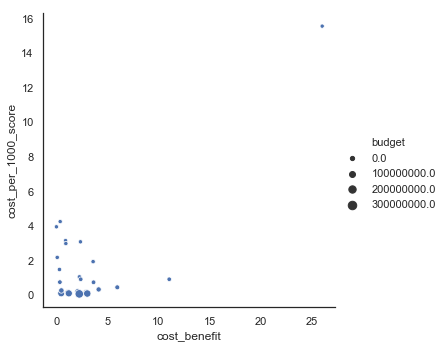

In [111]:
plt.figure(figsize=(16, 8))
sns.set(style="white")
aa = sns.relplot(x='cost_benefit',
                 y='cost_per_1000_score',
                 size='budget',
                 data=cb_plot)

Text(0.5, 1.0, 'Company and Consumer Cost-Benefit')

<Figure size 1152x576 with 0 Axes>

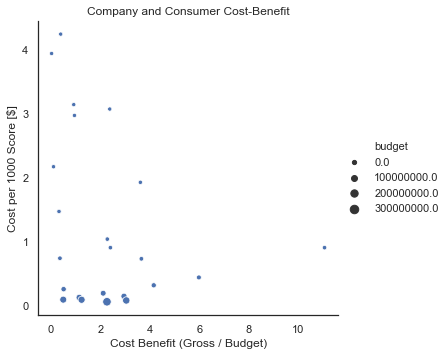

In [132]:
cb_plot_zoom = cb_plot.drop(cb_plot.index[cb_plot.shape[0]-1])
cb_plot_zoom

plt.figure(figsize=(16, 8))
sns.set(style="white")
ab = sns.relplot(x='cost_benefit',
                 y='cost_per_1000_score',
                 size='budget',
                 data=cb_plot_zoom)
ab.set_axis_labels('Cost Benefit (Gross / Budget)', 'Cost per 1000 Score [$]')
plt.title('Company and Consumer Cost-Benefit')

In [7]:
junction = pd.read_sql_query('''SELECT genre, certificate, imdb_rating FROM genres
                  LEFT JOIN movie_genres
                  ON movie_genres.genre_id = genres.id
                  LEFT JOIN movies
                  ON movies.imdb_id = movie_genres.movie_id
                  GROUP BY genre, certificate''', conn)

junction.head()

,genre,certificate,imdb_rating
0,Action,None,NaN
1,Action,Approved,NaN
2,Action,G,5.7
3,Action,Not Rated,5.6
4,Action,PG,NaN


In [8]:
junction.shape

(196, 3)

In [9]:
certificates = pd.read_sql_query('''SELECT certificate, imdb_rating FROM genres
                  LEFT JOIN movie_genres
                  ON movie_genres.genre_id = genres.id
                  LEFT JOIN movies
                  ON movies.imdb_id = movie_genres.movie_id
                  GROUP BY certificate''', conn)

certificates

,certificate,imdb_rating
0,None,NaN
1,Approved,NaN
2,E10+,NaN
3,G,5.6
4,M,NaN
5,Not Rated,5.9
6,Open,NaN
7,PG,5.1
8,PG-13,5.4
9,R,6.7


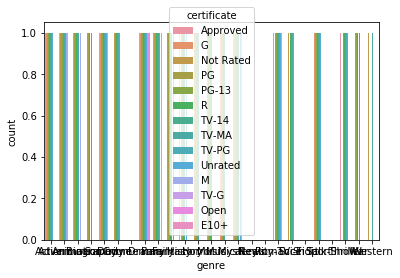

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

ax = sns.countplot(x="genre", hue="certificate", data=junction)

In [11]:
heatmap_data = pd.DataFrame(index=genres['genre'], columns=certificates['certificate'])
heatmap_data

for i in range(junction.shape[0]):
    genr = junction.iloc[i]['genre']
    cert = junction.iloc[i]['certificate']
    imdb = junction.iloc[i]['imdb_rating']
    
    heatmap_data.at[genr,cert] = imdb
    
heatmap_data = heatmap_data.fillna(0)
heatmap_data

certificate,None,Approved,E10+,G,M,Not Rated,Open,PG,PG-13,R,TV-14,TV-G,TV-MA,TV-PG,Unrated
genre,,,,,,,,,,,,,,,
War,0.0,0.0,0,0.0,0,5.9,0,0.0,5.4,6.7,0.0,0.0,6.9,0.0,0.0
Western,0.0,0.0,0,0.0,0,6.3,0,0.0,0.0,6.5,0.0,0.0,4.5,0.0,0.0
Animation,0.0,0.0,0,5.6,0,5.0,0,5.1,7.1,7.8,5.6,2.7,6.6,7.9,0.0
Thriller,7.0,0.0,0,0.0,0,4.6,0,0.0,6.8,7.3,4.9,0.0,5.4,5.7,0.0
Adventure,0.0,0.0,0,5.6,0,6.5,0,4.2,7.6,6.5,4.7,5.3,4.7,7.1,1.7
Sci-Fi,5.6,0.0,0,0.0,0,7.0,0,0.0,6.8,4.6,4.9,0.0,5.4,5.3,1.7
Biography,8.5,0.0,0,0.0,0,7.1,0,7.4,5.4,7.3,0.0,0.0,7.1,0.0,0.0
Sport,7.4,0.0,0,5.5,0,7.5,0,6.4,6.2,4.7,8.4,0.0,7.8,4.9,4.7
Reality-TV,0.0,0.0,0,0.0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


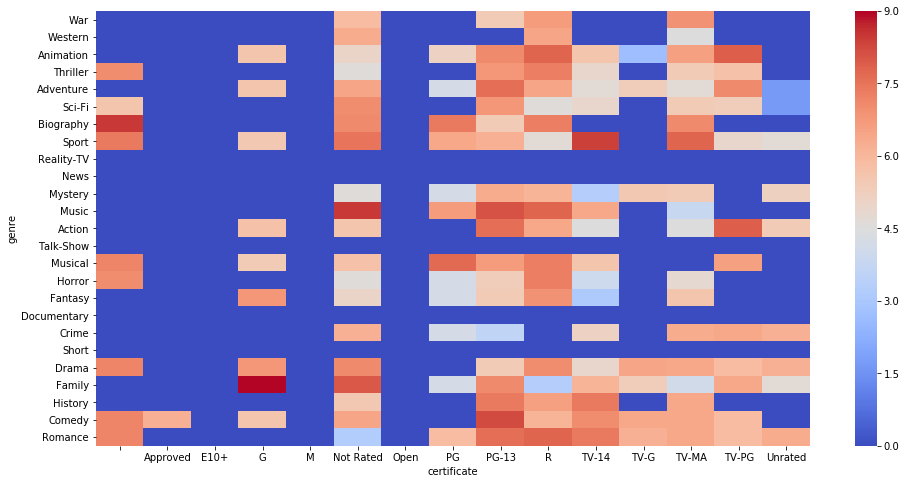

In [12]:
plt.figure(figsize=(16, 8))
ay = sns.heatmap(heatmap_data, cmap='coolwarm')